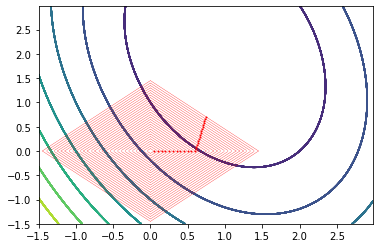

In [14]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class L1_constraint_optimization:
    def __init__(self):
        self.w_1 = np.arange(-1.5,3,0.01)
        self.w_2 = np.arange(-1.5,3,0.02)
        self.W1, self.W2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
        # 評価関数値
        self.Value = np.zeros((len(self.w_1), len(self.w_2)))
        # 重み行列
        self.A = np.array([[3, 0.5],[0.5, 1]])
        # 平均
        self.mu = np.array([[1],[2]])
    
    def calc_eval_fun(self):
        # 評価関数値の計算
        for i in range(len(self.w_1)):
            for j in range(len(self.w_2)):
                w = np.vstack([self.w_1[i], self.w_2[j]])
                self.Value[i, j] = np.dot(np.dot((w - self.mu).T, self.A), w - self.mu)
                
    def main(self):
        for lamda in np.arange(0.05, 1.5,  0.05):
            # 不等式制約の範囲
            wrange = np.arange(0, lamda, 0.01)
            plt.contour(self.W1, self.W2, self.Value)
            plt.plot(wrange, -wrange + lamda, 'r-', linewidth=0.3)
            plt.plot(-wrange, -wrange + lamda, 'r-', linewidth=0.3)
            plt.plot(wrange, wrange - lamda, 'r-', linewidth=0.3)
            plt.plot(-wrange, wrange - lamda, 'r-', linewidth=0.3)
            # cvx
            # 重み係数
            w_lasso = cv.Variable((2, 1))
            # 評価関数値
            J = cv.quad_form(w_lasso - self.mu, self.A)
            # 評価関数の最小値
            objective = cv.Minimize(J)
            # 不等式制約
            constraints = [cv.norm(w_lasso, 1) <= lamda]
            prob = cv.Problem(objective, constraints)
            result = prob.solve(solver =cv.CVXOPT) 
            w_lasso = w_lasso.value
            plt.plot(w_lasso[0], w_lasso[1],'ro', markersize = 1.0)
            
L1 = L1_constraint_optimization()
L1.calc_eval_fun()
L1.main()